<p style="background-color:#129480;color:black;font-size:35px;text-align:center;border-radius:12px 12px;font-weight:bold;border:2px solid purple;line-height:1.5cm">✈️AIRLINE SERVICE SATISFACTION✈️
<span style='font-size:35px;'></p></span>

# Import all required library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly
import os 
import seaborn as sns

from plotly import express as px
from plotly import graph_objs as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression, Perceptron
from sklearn.feature_selection import SelectKBest, f_classif, RFE, chi2, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity,calculate_kmo
from factor_analyzer.rotator import ORTHOGONAL_ROTATIONS, OBLIQUE_ROTATIONS

from scipy import stats 

from IPython.display import display, HTML
def show_df(df):
    display(HTML(df.to_html().replace("\\n","<br>")))   # Use the line-break (br) tag of html to handle each shrinked text in pd.Dataframe 
    
np.random.seed(0) # Fixed the result for all run

# Basic Data Pre-processing

## Load the dataset and view the data

In [2]:
# Dataset obtained from https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction
df = pd.read_csv("airline_passenger_satisfaction.csv")
df.head(4)

ID  Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0   1    Male   48    First-time       Business  Business              821   
1   2  Female   35     Returning       Business  Business              821   
2   3    Male   41     Returning       Business  Business              853   
3   4    Male   50     Returning       Business  Business             1905   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   

   ...  On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0  ...                 3             5                 2            5   
1  ...                 5             4                 5            5   
2  ...                 3             5                 3            5   
3  ...                 5             5                 5            4   

   Food and Drink  In-flight Service  In-flight Wifi Service  \
0               5                  5                       3   
1               3                  5                       2   
2               5                  3                       4   
3               4                  5                       2   

   In-flight Entertainment  Baggage Handling             Satisfaction  
0                        5                 5  Neutral or Dissatisfied  
1                        5                 5                Satisfied  
2                        3                 3                Satisfied  
3                        5                 5                Satisfied  

[4 rows x 24 columns]

## Remove unnecessary variable - id

In [3]:
# Drop the id
df = df.iloc[:,df.columns!="ID"]
df.head(5)

Gender  Age Customer Type Type of Travel     Class  Flight Distance  \
0    Male   48    First-time       Business  Business              821   
1  Female   35     Returning       Business  Business              821   
2    Male   41     Returning       Business  Business              853   
3    Male   50     Returning       Business  Business             1905   
4  Female   49     Returning       Business  Business             3470   

   Departure Delay  Arrival Delay  Departure and Arrival Time Convenience  \
0                2            5.0                                       3   
1               26           39.0                                       2   
2                0            0.0                                       4   
3                0            0.0                                       2   
4                0            1.0                                       3   

   Ease of Online Booking  ...  On-board Service  Seat Comfort  \
0                       3  ...                 3             5   
1                       2  ...                 5             4   
2                       4  ...                 3             5   
3                       2  ...                 5             5   
4                       3  ...                 3             4   

   Leg Room Service  Cleanliness  Food and Drink  In-flight Service  \
0                 2            5               5                  5   
1                 5            5               3                  5   
2                 3            5               5                  3   
3                 5            4               4                  5   
4                 4            5               4                  3   

   In-flight Wifi Service  In-flight Entertainment  Baggage Handling  \
0                       3                        5                 5   
1                       2                        5                 5   
2                       4                        3                 3   
3                       2                        5                 5   
4                       3                        3                 3   

              Satisfaction  
0  Neutral or Dissatisfied  
1                Satisfied  
2                Satisfied  
3                Satisfied  
4                Satisfied  

[5 rows x 23 columns]

## Deal with the NULL value

In [4]:
print("The dataset contain NULL value?", df.isnull().any().any())
print("The dimension of the dataset  :", df.shape)

The dataset contain NULL value? True
The dimension of the dataset  : (129880, 23)


In [5]:
col_miss = [(col,df[col].isnull().sum()) for col in df.columns if df[col].isnull().sum() > 0]
print("The columns with missing value and the number of missing value:", col_miss)

The columns with missing value and the number of missing value: [('Arrival Delay', 393)]


In [6]:
saved_mean = []
for col,_ in col_miss:
    mean = df[col].mean()
    
    df.loc[:,col].fillna(mean, inplace=True)
    saved_mean.append(mean)

In [7]:
print("The dataset contain NULL value?", df.isnull().any().any())

The dataset contain NULL value? False


# Descriptive Statistic

## Basic Analysis
<a id = "OUT_8"></a>

In [8]:
df.describe().T

count         mean         std  \
Age                                     129880.0    39.427957   15.119360   
Flight Distance                         129880.0  1190.316392  997.452477   
Departure Delay                         129880.0    14.713713   38.071126   
Arrival Delay                           129880.0    15.091129   38.407410   
Departure and Arrival Time Convenience  129880.0     3.057599    1.526741   
Ease of Online Booking                  129880.0     2.756876    1.401740   
Check-in Service                        129880.0     3.306267    1.266185   
Online Boarding                         129880.0     3.252633    1.350719   
Gate Location                           129880.0     2.976925    1.278520   
On-board Service                        129880.0     3.383023    1.287099   
Seat Comfort                            129880.0     3.441361    1.319289   
Leg Room Service                        129880.0     3.350878    1.316252   
Cleanliness                             129880.0     3.286326    1.313682   
Food and Drink                          129880.0     3.204774    1.329933   
In-flight Service                       129880.0     3.642193    1.176669   
In-flight Wifi Service                  129880.0     2.728696    1.329340   
In-flight Entertainment                 129880.0     3.358077    1.334049   
Baggage Handling                        129880.0     3.632114    1.180025   

                                         min    25%    50%     75%     max  
Age                                      7.0   27.0   40.0    51.0    85.0  
Flight Distance                         31.0  414.0  844.0  1744.0  4983.0  
Departure Delay                          0.0    0.0    0.0    12.0  1592.0  
Arrival Delay                            0.0    0.0    0.0    13.0  1584.0  
Departure and Arrival Time Convenience   0.0    2.0    3.0     4.0     5.0  
Ease of Online Booking                   0.0    2.0    3.0     4.0     5.0  
Check-in Service                         0.0    3.0    3.0     4.0     5.0  
Online Boarding                          0.0    2.0    3.0     4.0     5.0  
Gate Location                            0.0    2.0    3.0     4.0     5.0  
On-board Service                         0.0    2.0    4.0     4.0     5.0  
Seat Comfort                             0.0    2.0    4.0     5.0     5.0  
Leg Room Service                         0.0    2.0    4.0     4.0     5.0  
Cleanliness                              0.0    2.0    3.0     4.0     5.0  
Food and Drink                           0.0    2.0    3.0     4.0     5.0  
In-flight Service                        0.0    3.0    4.0     5.0     5.0  
In-flight Wifi Service                   0.0    2.0    3.0     4.0     5.0  
In-flight Entertainment                  0.0    2.0    4.0     4.0     5.0  
Baggage Handling                         1.0    3.0    4.0     5.0     5.0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Gender                                  129880 non-null  object 
 1   Age                                     129880 non-null  int64  
 2   Customer Type                           129880 non-null  object 
 3   Type of Travel                          129880 non-null  object 
 4   Class                                   129880 non-null  object 
 5   Flight Distance                         129880 non-null  int64  
 6   Departure Delay                         129880 non-null  int64  
 7   Arrival Delay                           129880 non-null  float64
 8   Departure and Arrival Time Convenience  129880 non-null  int64  
 9   Ease of Online Booking                  129880 non-null  int64  
 10  Check-in Service                        1298

<a id = "OUT_10"></a>

In [10]:
df['Satisfaction'].value_counts()

Neutral or Dissatisfied    73452
Satisfied                  56428
Name: Satisfaction, dtype: int64

## Get the categorical and numerical columns name

In [11]:
numerical = [x for x in df.columns if len(df[x].unique()) > 6]    # define categorical variables (columns)
categorical = list(set(df.columns) - set(numerical))  # define numerical variables (columns)

print(f"{len(numerical)} Numerical variables (columns) are: {np.sort(numerical)}\n")
print(f"{len(categorical)} Categorical variables (columns) are: {np.sort(categorical)}")

4 Numerical variables (columns) are: ['Age' 'Arrival Delay' 'Departure Delay' 'Flight Distance']

19 Categorical variables (columns) are: ['Baggage Handling' 'Check-in Service' 'Class' 'Cleanliness'
 'Customer Type' 'Departure and Arrival Time Convenience'
 'Ease of Online Booking' 'Food and Drink' 'Gate Location' 'Gender'
 'In-flight Entertainment' 'In-flight Service' 'In-flight Wifi Service'
 'Leg Room Service' 'On-board Service' 'Online Boarding' 'Satisfaction'
 'Seat Comfort' 'Type of Travel']


## Find all unique value for each class

In [12]:
data = []
for col in df.columns:
    unique_value = np.unique(df[col]).tolist()
    temp_str = ""
    data.append([col, len(unique_value), ",".join(str(value) for value in unique_value ) ])
df_temp = pd.DataFrame(data, columns=["Columns Name", "Num of unique value", "Unique Value"])
pd.options.display.max_colwidth = 70
df_temp

Columns Name  Num of unique value  \
0                                   Gender                    2   
1                                      Age                   75   
2                            Customer Type                    2   
3                           Type of Travel                    2   
4                                    Class                    3   
5                          Flight Distance                 3821   
6                          Departure Delay                  466   
7                            Arrival Delay                  473   
8   Departure and Arrival Time Convenience                    6   
9                   Ease of Online Booking                    6   
10                        Check-in Service                    6   
11                         Online Boarding                    6   
12                           Gate Location                    6   
13                        On-board Service                    6   
14                            Seat Comfort                    6   
15                        Leg Room Service                    6   
16                             Cleanliness                    6   
17                          Food and Drink                    6   
18                       In-flight Service                    6   
19                  In-flight Wifi Service                    6   
20                 In-flight Entertainment                    6   
21                        Baggage Handling                    5   
22                            Satisfaction                    2   

                                                             Unique Value  
0                                                             Female,Male  
1   7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,...  
2                                                    First-time,Returning  
3                                                       Business,Personal  
4                                           Business,Economy,Economy Plus  
5   31,56,67,73,74,76,77,78,80,82,83,84,86,89,90,95,96,98,100,101,102,...  
6   0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,2...  
7   0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,1...  
8                                                             0,1,2,3,4,5  
9                                                             0,1,2,3,4,5  
10                                                            0,1,2,3,4,5  
11                                                            0,1,2,3,4,5  
12                                                            0,1,2,3,4,5  
13                                                            0,1,2,3,4,5  
14                                                            0,1,2,3,4,5  
15                                                            0,1,2,3,4,5  
16                                                            0,1,2,3,4,5  
17                                                            0,1,2,3,4,5  
18                                                            0,1,2,3,4,5  
19                                                            0,1,2,3,4,5  
20                                                            0,1,2,3,4,5  
21                                                              1,2,3,4,5  
22                                      Neutral or Dissatisfied,Satisfied

## Boxplot for numerical variable
* The information that can get from boxplot is as below:
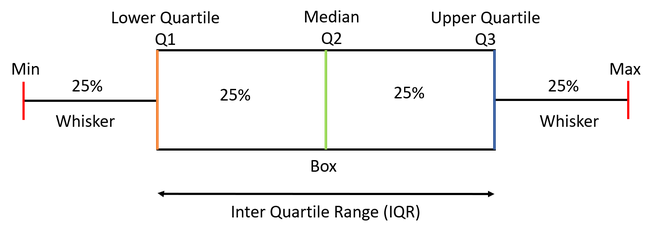
<p style="text-align:center"> <a href="https://www.geeksforgeeks.org/box-plot/">Image Sources</a> </p>
* where the value that are out of the fences of the boxplot are considered as extreme outliers.
* The actual value for the mean and Q1, Q3 can be obtain at [Out[8]](#OUT_8) 

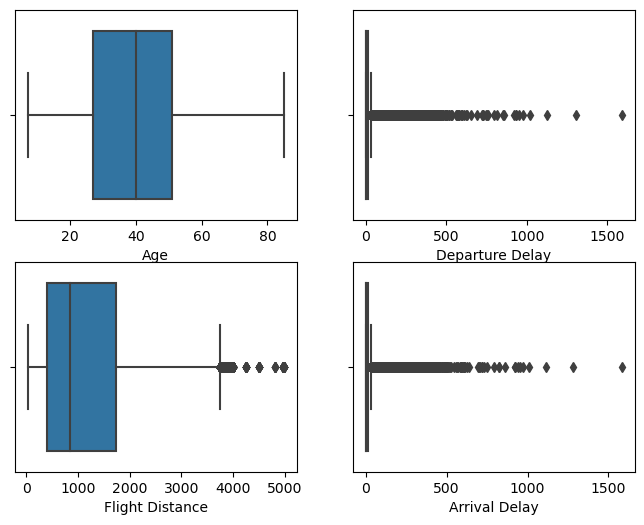

In [13]:
### TOO LAG but it is an interactive graph
# n_cols = 4
# n_rows = int(np.ceil(len(numerical) / n_cols))

# """ Boxplot using plotly.graph_objs """
# fig = make_subplots(rows=n_rows, cols=n_cols)
# for i, col in enumerate(numerical):
#     fig.add_trace(go.Box(name=col, y=df[col]), 
#                  row=i//n_cols + 1,
#                  col=i%n_cols + 1)
# fig.update_layout(title="Box plot of numerical columns",
#                  height=800,
#                  width=1200)
# fig.show()

_, ax = plt.subplots(2, 2, figsize=(8, 6))

for i, feature in enumerate(numerical):
    sns.boxplot(data=df, x=feature, ax = ax[i%2, i//2])      


## Kernel Density Estimate for numerical variable

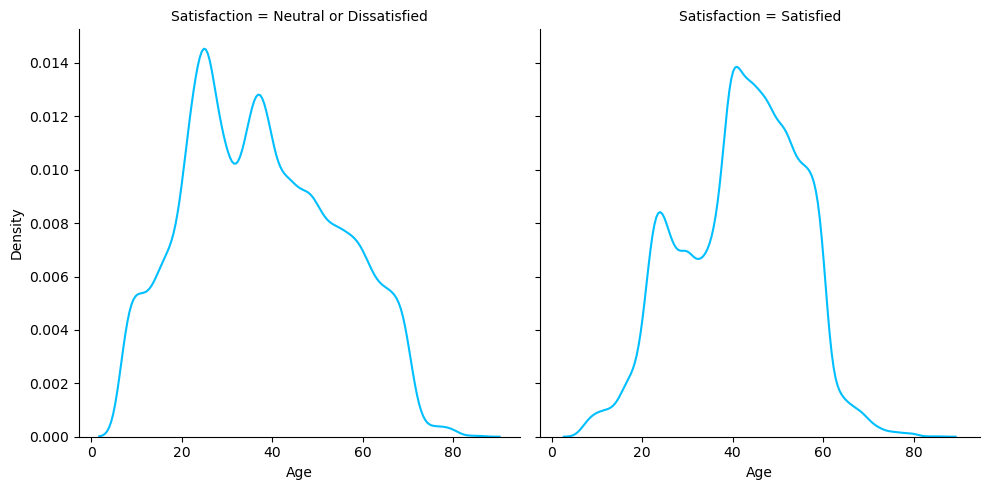

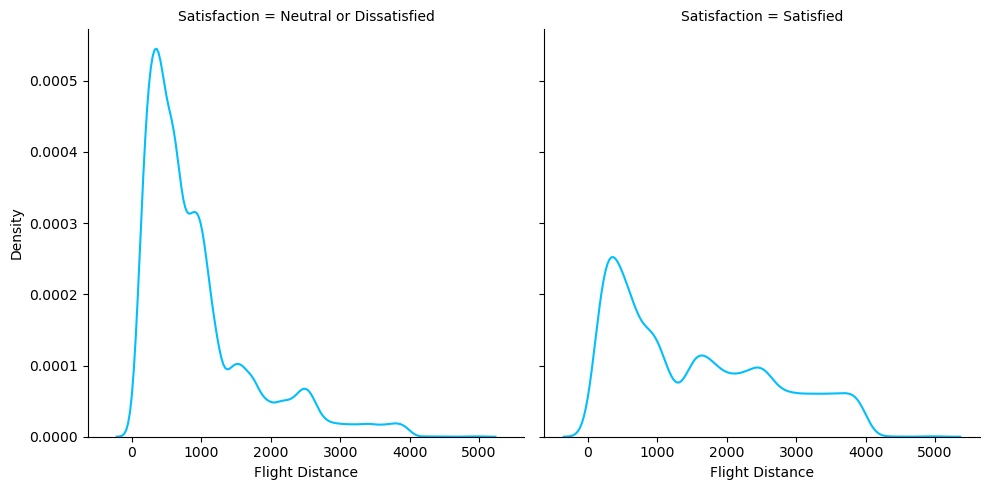

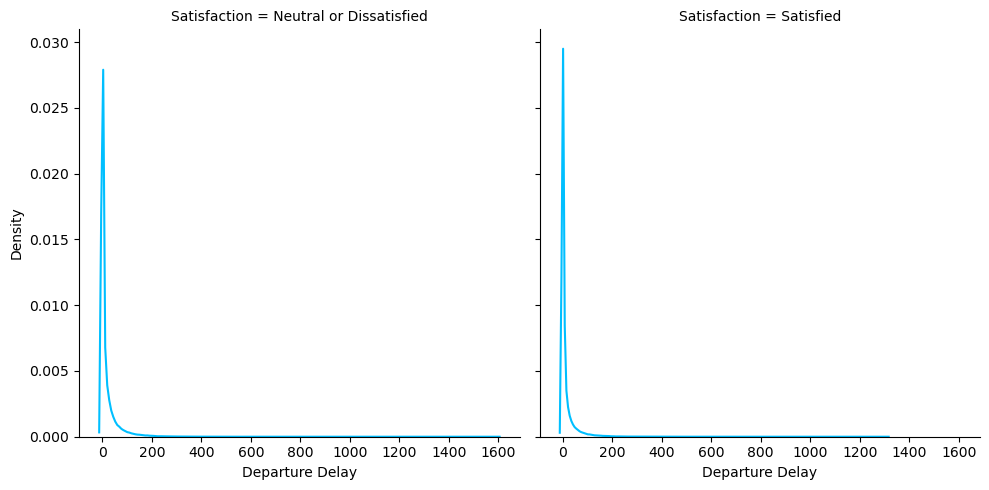

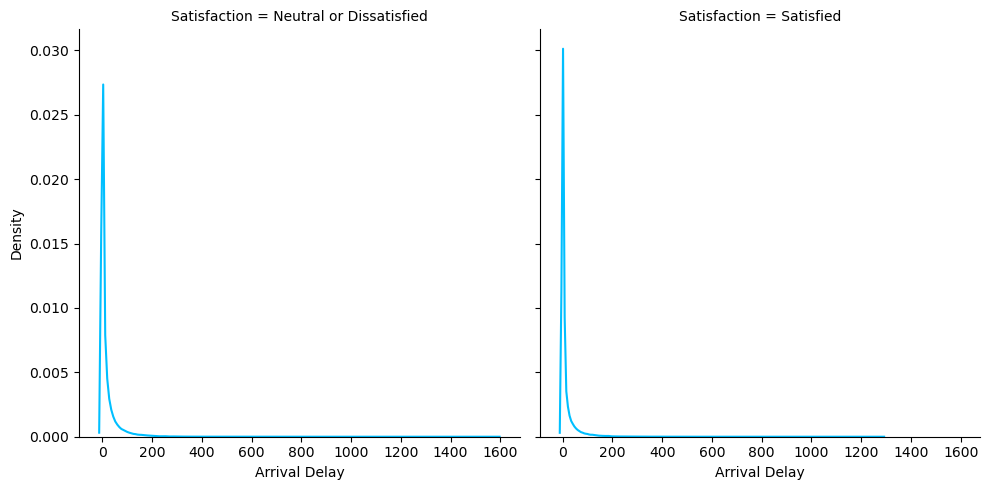

In [14]:
for feature in numerical: # KDE distribution of numerical feature
    sns.displot(x = feature,col='Satisfaction',data = df, kind="kde" ,color = 'deepskyblue')

In [15]:
"""Calculating the skewness of the numerical columns to show evidence of the assumption we made"""
df_skew = pd.DataFrame(df[numerical].skew())
df_skew.columns = ['skewness']

# |skew| > 0.50 is considered as moderately skewed, |skew| > 1.0 is considered as highly skewed
df_skew["too_skewed"] = abs(df_skew["skewness"]) > 0.50 
df_skew

skewness  too_skewed
Age             -0.003606       False
Flight Distance  1.108142        True
Departure Delay  6.821980        True
Arrival Delay    6.680239        True

## Histogram and Bivariate bar plot for categorical variables

In [16]:
def bivariate_bar_plot(n_cols, columns, figsize=(20,8)):
    n_rows = int(np.ceil(len(columns) / n_cols))
    _, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize = figsize)
    plt.suptitle('Satisfaction by categorical features')

    for i, col in enumerate(columns):
        x = sns.countplot(data=df[categorical], x=col, hue='Satisfaction', palette = ['deepskyblue','crimson'], ax=ax[i//n_cols, i%n_cols])
        for z in x.patches:
          x.annotate('{:.1f}'.format((z.get_height()/df[categorical].shape[0])*100)+'%',(z.get_x()+0.25, z.get_height()+0.01))

In [17]:
n_cols = 3
n_rows = 2

"""Histogram using plotly"""
fig = make_subplots(rows=n_rows, cols=n_cols,
                    subplot_titles=tuple(df.select_dtypes('object').columns))
for i, col in enumerate(df.select_dtypes('object').columns):
    counts = df[col].value_counts()
    fig.add_trace(go.Bar(name=col, x=counts.index, y=counts.values), 
                  row=i//n_cols + 1,
                  col=i%n_cols + 1)

fig.update_layout(title="Histogram plot of categorical columns",
                 height=500,
                 width=800,
                 showlegend=False)

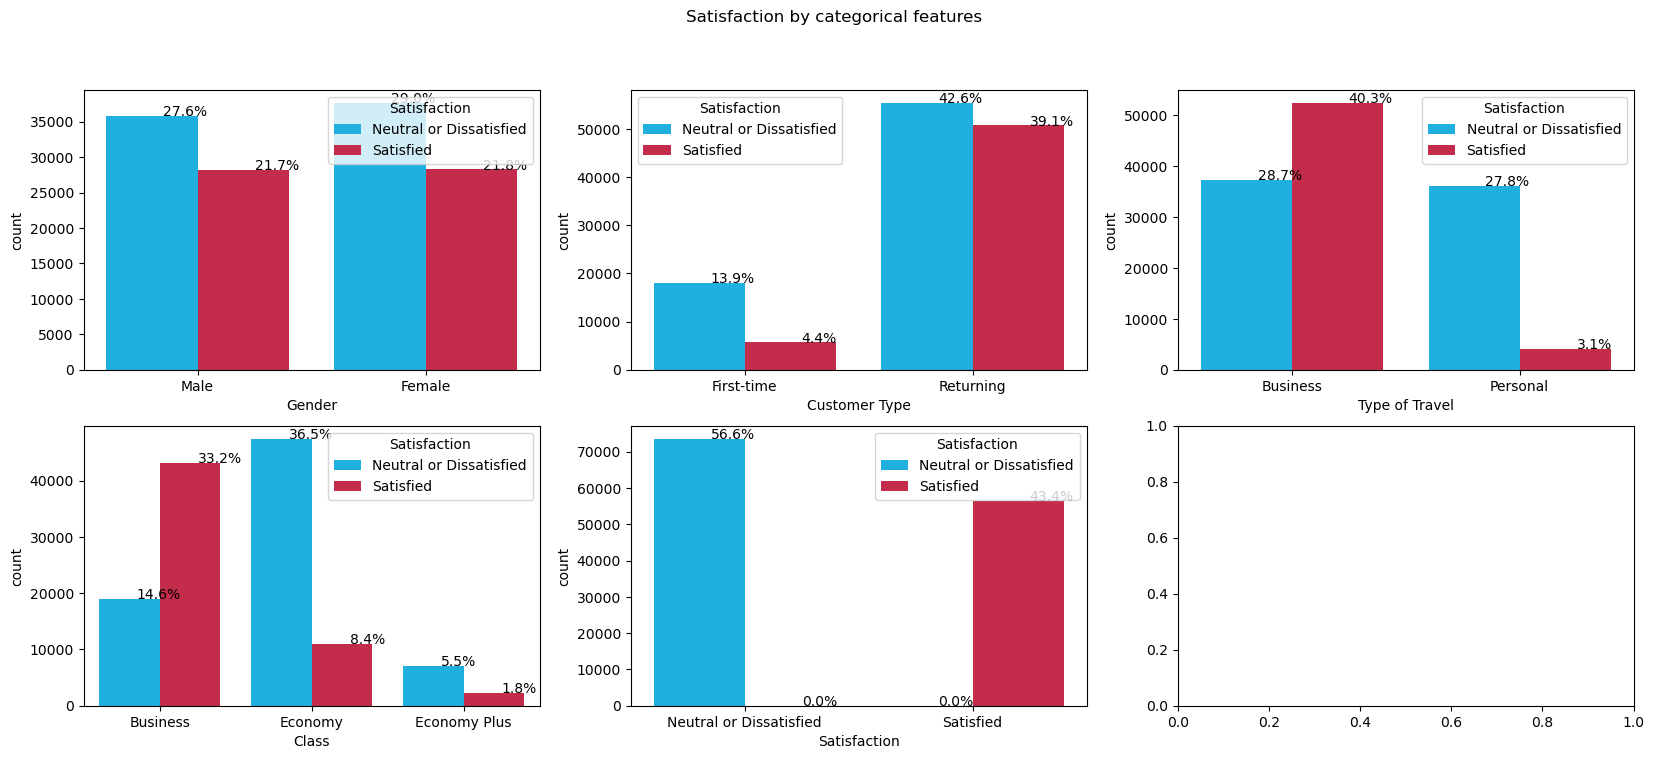

In [18]:
bivariate_bar_plot(3, df.select_dtypes('object').columns)

In [19]:
scale_1_to_5 = categorical.copy()
for col in df.select_dtypes('object').columns:
    scale_1_to_5.remove(col)
print(scale_1_to_5)

['Cleanliness', 'In-flight Entertainment', 'Gate Location', 'Food and Drink', 'In-flight Wifi Service', 'Seat Comfort', 'On-board Service', 'Ease of Online Booking', 'Online Boarding', 'Departure and Arrival Time Convenience', 'Check-in Service', 'In-flight Service', 'Leg Room Service', 'Baggage Handling']


In [20]:
n_cols = 3
n_rows = n_rows = int(np.ceil(len(scale_1_to_5) / n_cols))

"""Histogram using plotly"""
fig = make_subplots(rows=n_rows, cols=n_cols,
                    subplot_titles=tuple(scale_1_to_5))

for i, col in enumerate(scale_1_to_5):
    counts = df[col].value_counts()
    fig.add_trace(go.Bar(name=col, x=counts.index, y=counts.values), 
                  row=i//n_cols + 1,
                  col=i%n_cols + 1)

fig.update_layout(title="Histogram plot of categorical columns",
                 height=800,
                 width=1000,
                 showlegend=False)

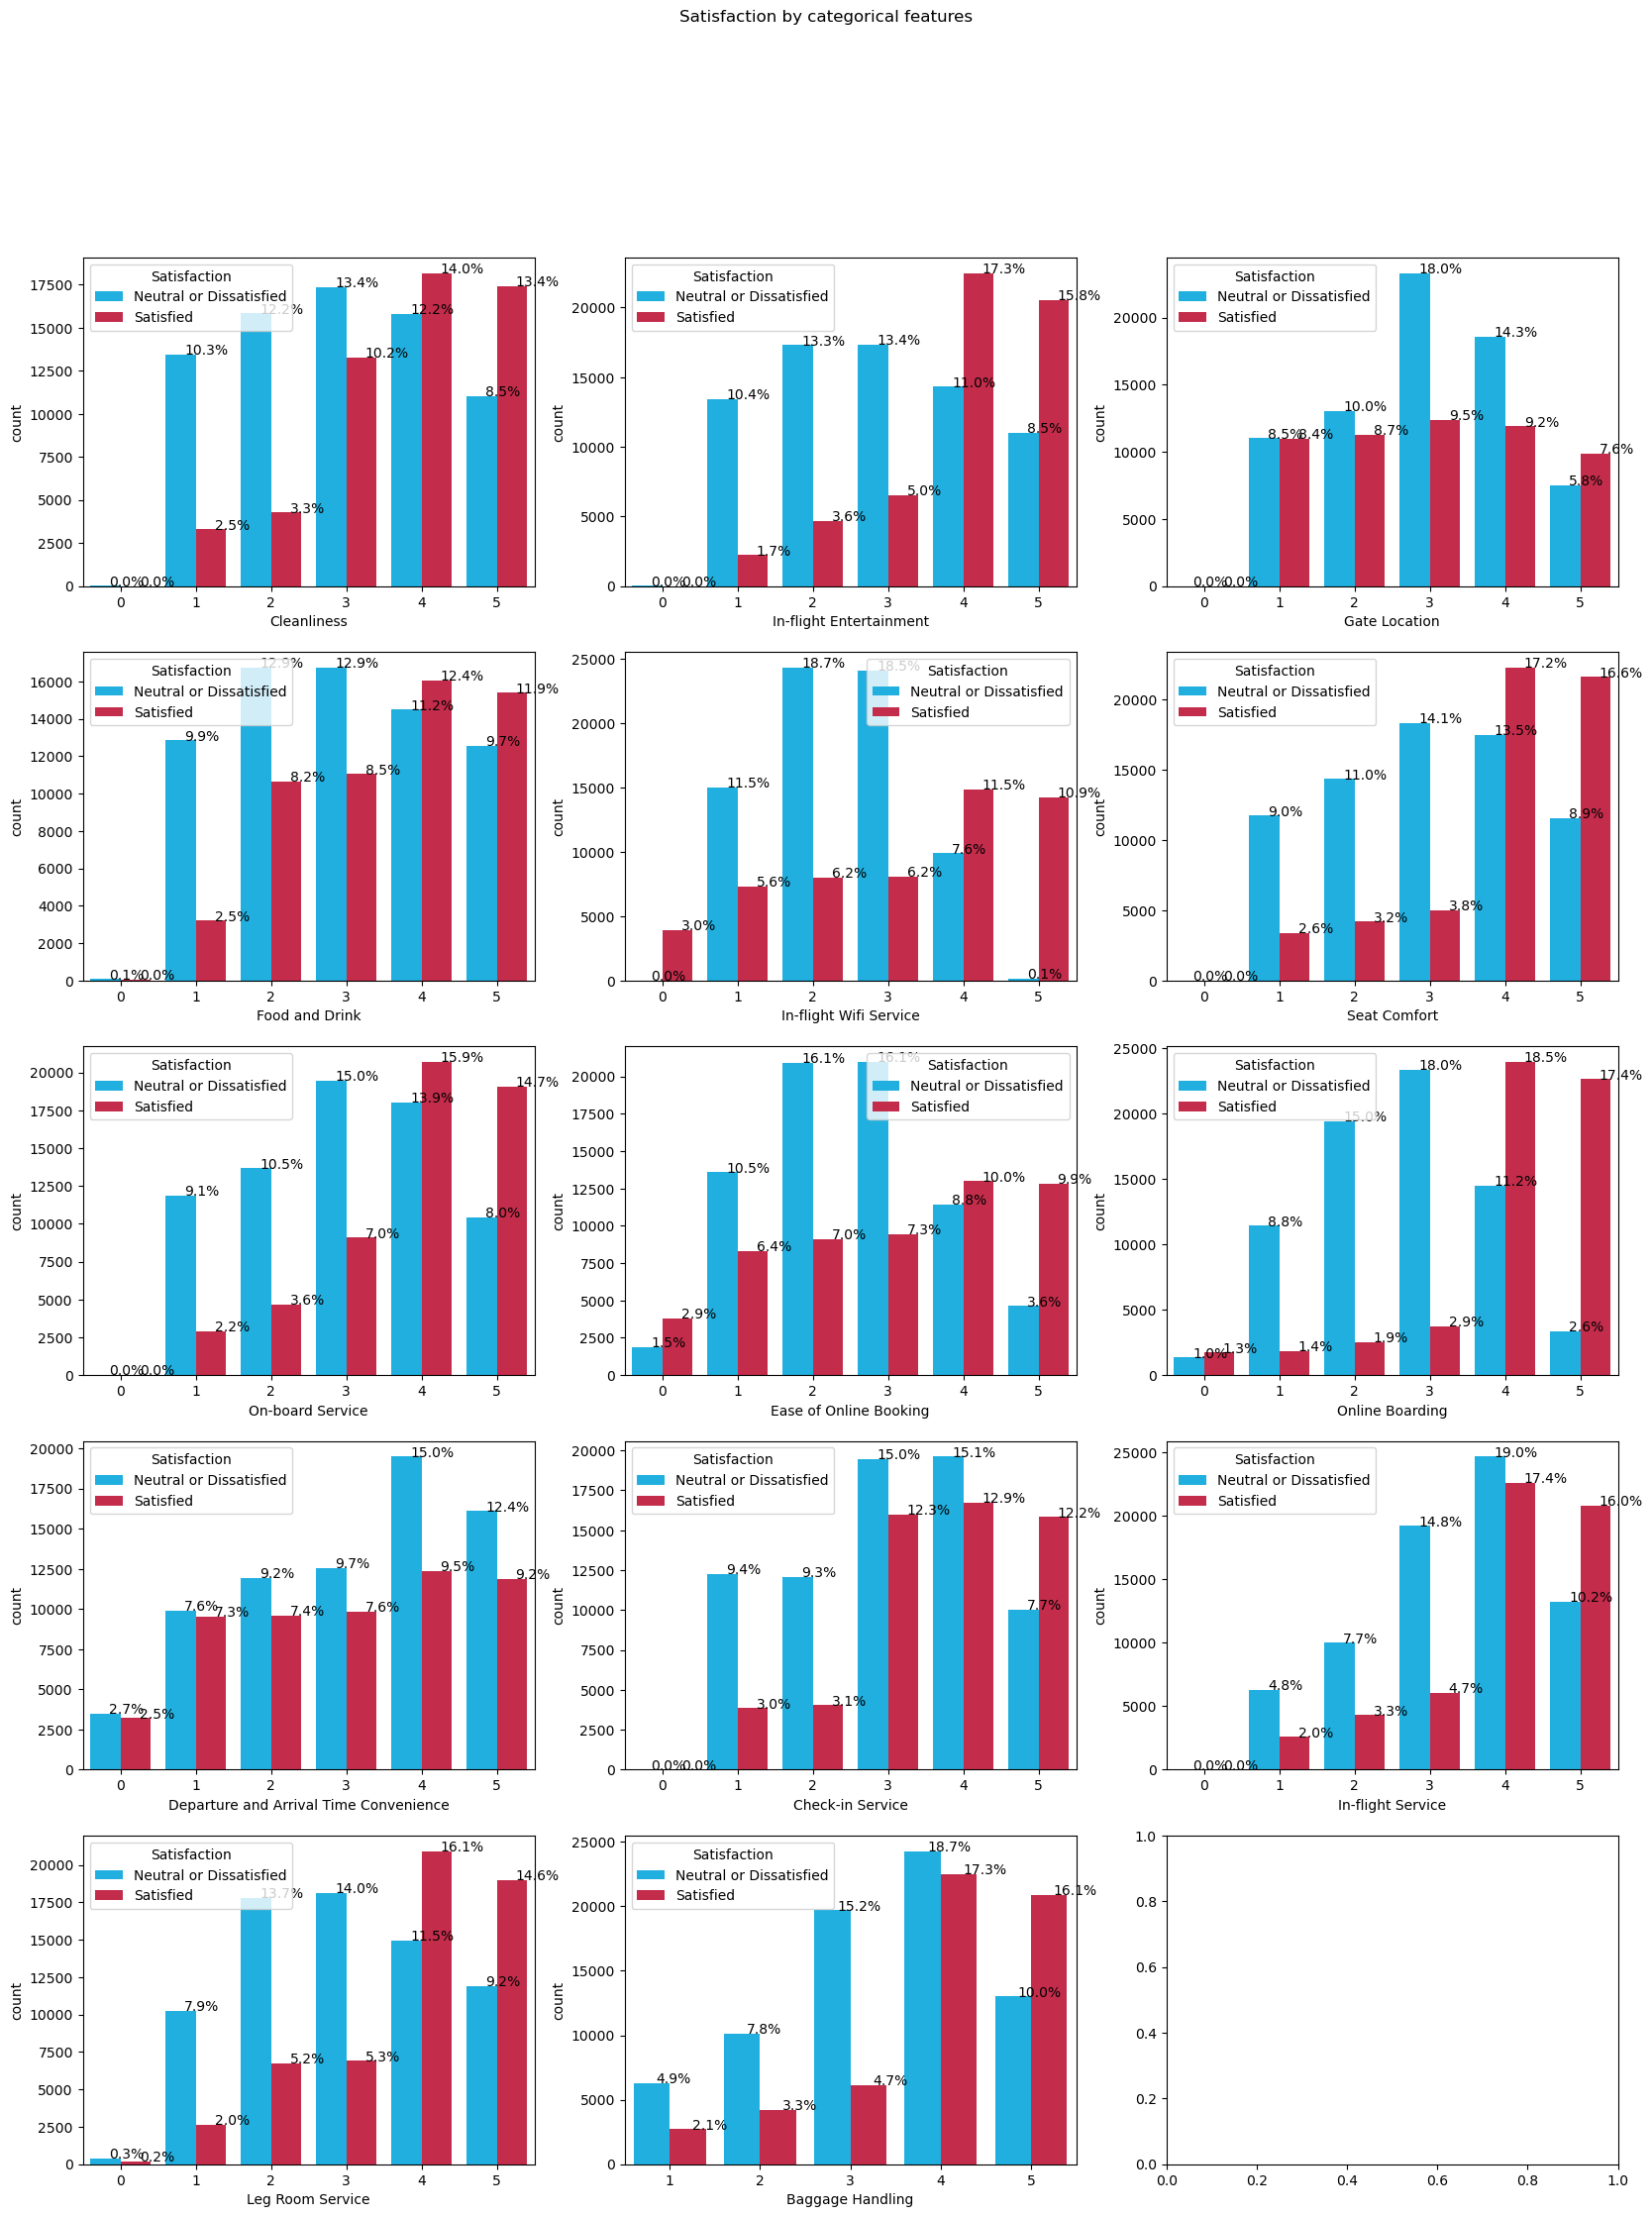

In [21]:
bivariate_bar_plot(3, scale_1_to_5, (20,25))

## Convert the categorical variable to numerical

In [22]:
for col in df.select_dtypes('object').columns:
    unique_value = np.unique(df[col])
    df[col] = df[col].replace(unique_value, np.arange(len(unique_value)))
    print(f"{col:<16}: {unique_value} have been converted to {np.arange(len(unique_value))}")

Gender          : ['Female' 'Male'] have been converted to [0 1]
Customer Type   : ['First-time' 'Returning'] have been converted to [0 1]
Type of Travel  : ['Business' 'Personal'] have been converted to [0 1]
Class           : ['Business' 'Economy' 'Economy Plus'] have been converted to [0 1 2]
Satisfaction    : ['Neutral or Dissatisfied' 'Satisfied'] have been converted to [0 1]


## Correlation Heatmap

<Axes: >

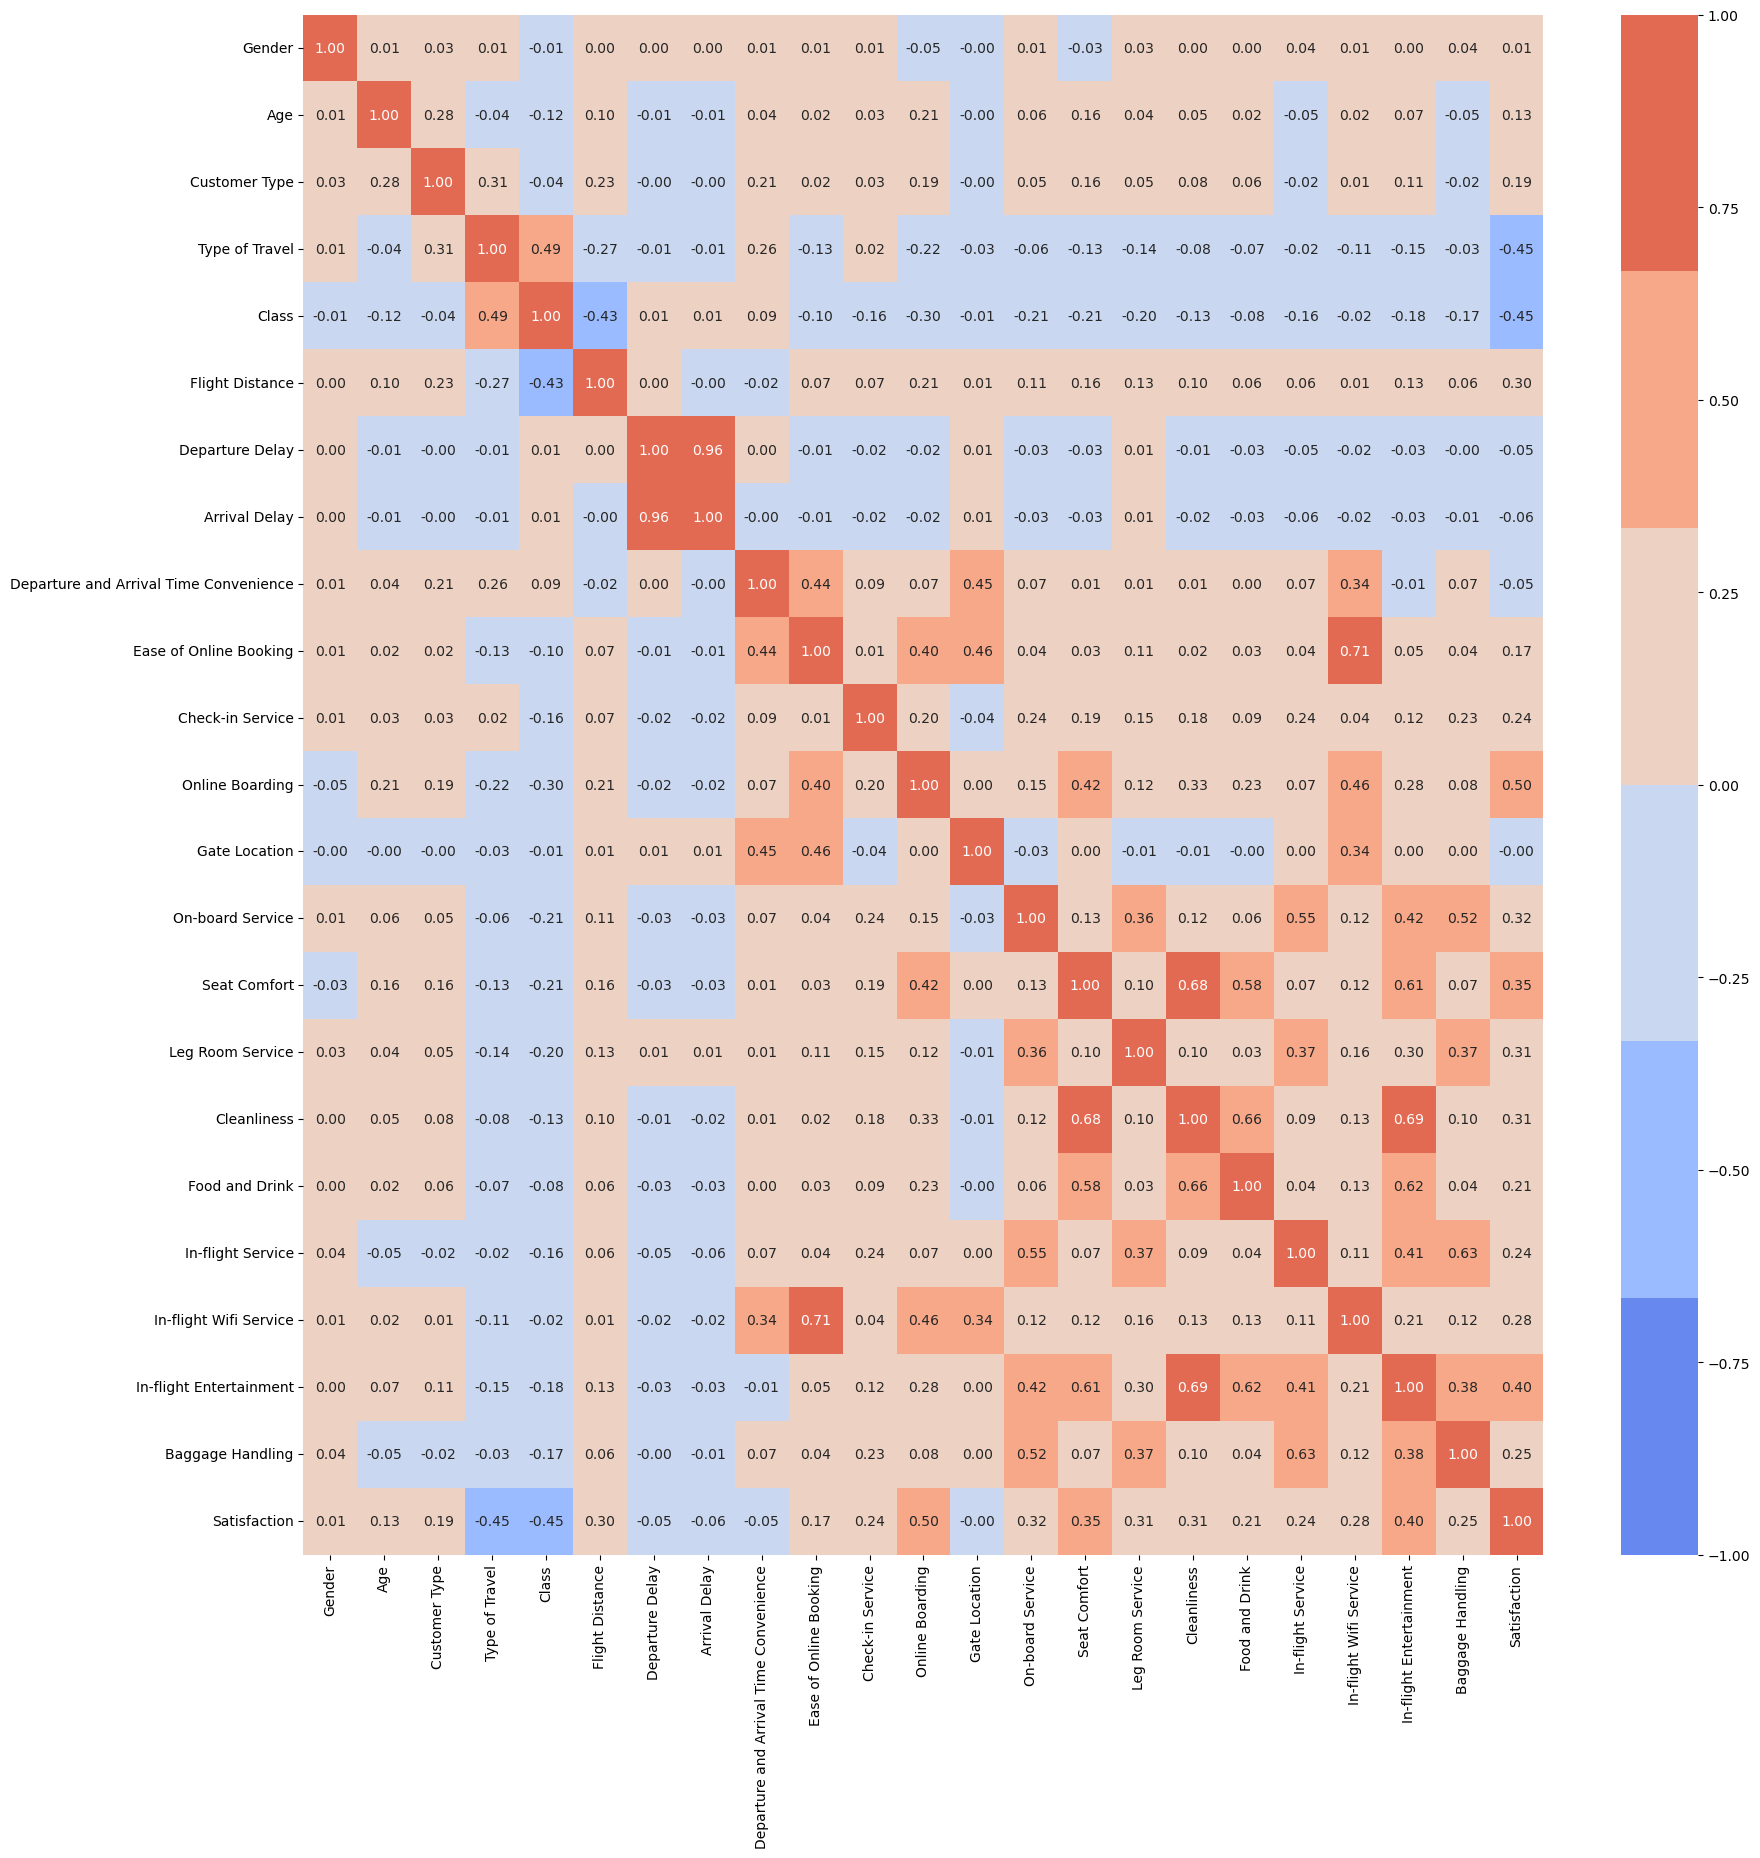

In [23]:
# Overall covariance matrix
fig, ax = plt.subplots(figsize=(20, 20))   
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f", cmap = sns.color_palette("coolwarm"), ax=ax)

In [24]:
# The correlation of each variable with the target variable (Satisfication)
fig = go.Figure()
corr_target = df.corr()["Satisfaction"]
fig.add_trace(go.Bar(x=corr_target.index, y=corr_target.values))
fig.update_layout(title="Correlation Histogram between features and target", 
                  xaxis_title='Features', yaxis_title='Correlation', barmode='group')
fig.show()

# Futher pre-process the data after analysis

##  Quantile Transformation to remove extreme outliers

In [25]:
from sklearn.preprocessing import QuantileTransformer

qt = QuantileTransformer(n_quantiles=1000, output_distribution='normal')
df_qt = df.copy()
df_qt[["Flight Distance", "Departure Delay", "Arrival Delay"]] = qt.fit_transform(df[["Flight Distance", "Departure Delay", "Arrival Delay"]])

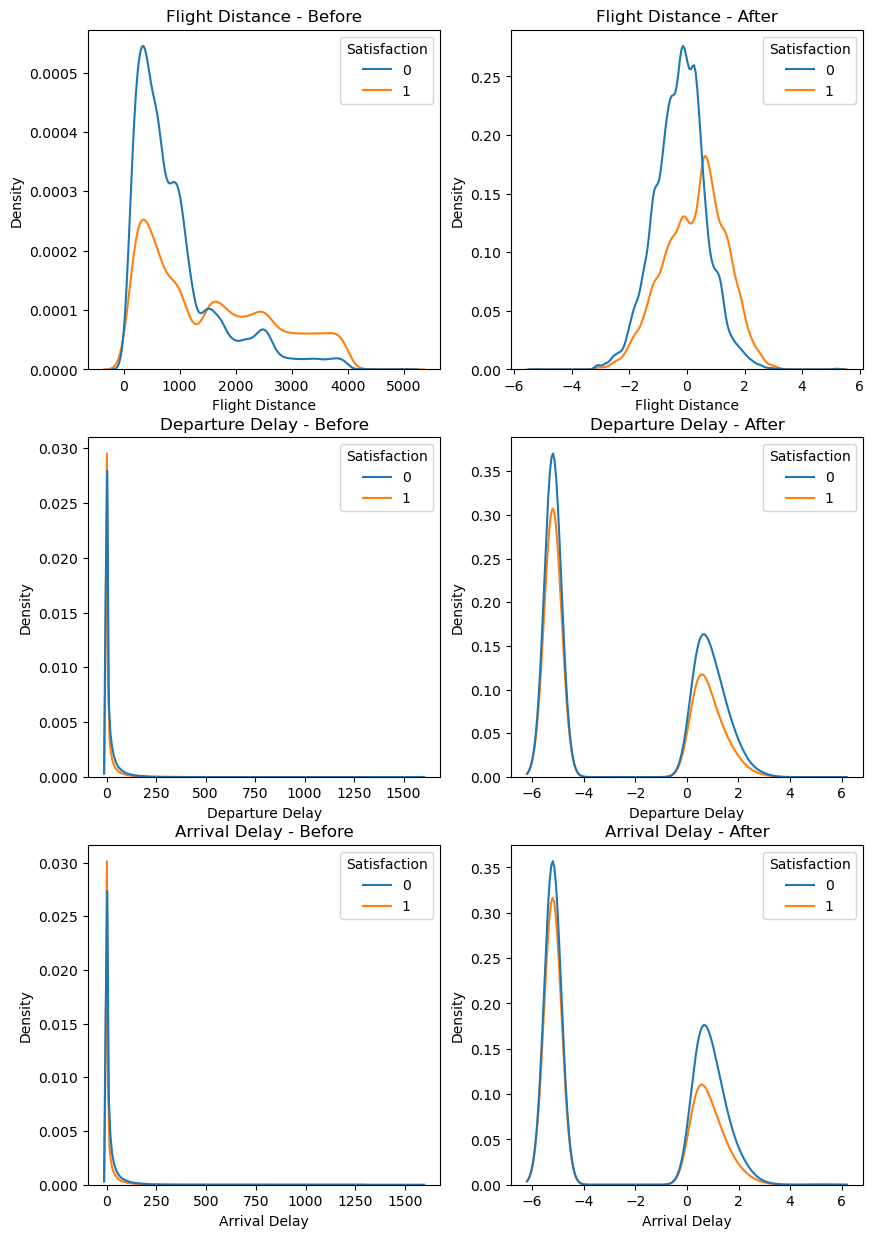

In [26]:
"""KDE distribution of numerical features"""
fig, ax = plt.subplots(3,2,figsize=(10,15))
for i,feature in enumerate(["Flight Distance", "Departure Delay", "Arrival Delay"]):
    sns.kdeplot(data = df   , x = feature, hue='Satisfaction',color = 'deepskyblue', ax=ax[i][0])
    sns.kdeplot(data = df_qt, x = feature, hue='Satisfaction',color = 'deepskyblue', ax=ax[i][1])
    ax[i][0].set_title(f"{feature} - Before")
    ax[i][1].set_title(f"{feature} - After")

In [27]:
df_skew = pd.DataFrame(df_qt[numerical].skew())
df_skew.columns = ['skewness']

# |skew| > 0.50 is considered as moderately skewed, |skew| > 1.0 is considered as highly skewed
df_skew["too_skewed"] = abs(df_skew["skewness"]) > 0.50 
df_skew

skewness  too_skewed
Age             -0.003606       False
Flight Distance  0.036018       False
Departure Delay  0.312650       False
Arrival Delay    0.294659       False

In [28]:
df = df_qt.copy()
del df_qt

## Normalize the dataset

In [ ]:
sc = MinMaxScaler()
columns_name = df.columns
df = sc.fit_transform(df)
df = pd.DataFrame(df, columns = columns_name)
df

Gender       Age  Customer Type  Type of Travel  Class  \
0          1.0  0.525641            0.0             0.0    0.0   
1          0.0  0.358974            1.0             0.0    0.0   
2          1.0  0.435897            1.0             0.0    0.0   
3          1.0  0.551282            1.0             0.0    0.0   
4          0.0  0.538462            1.0             0.0    0.0   
...        ...       ...            ...             ...    ...   
129875     1.0  0.269231            1.0             1.0    1.0   
129876     1.0  0.435897            1.0             1.0    1.0   
129877     1.0  0.448718            1.0             1.0    1.0   
129878     1.0  0.551282            1.0             1.0    1.0   
129879     0.0  0.166667            1.0             1.0    1.0   

        Flight Distance  Departure Delay  Arrival Delay  \
0              0.497130         0.526012       0.537744   
1              0.497130         0.598378       0.617894   
2              0.500241         0.000000       0.000000   
3              0.572413         0.000000       0.000000   
4              0.668886         0.000000       0.517837   
...                 ...              ...            ...   
129875         0.442017         0.526012       0.528271   
129876         0.401214         0.000000       0.000000   
129877         0.412039         0.544085       0.568624   
129878         0.412039         0.607582       0.589624   
129879         0.412039         0.000000       0.000000   

        Departure and Arrival Time Convenience  Ease of Online Booking  ...  \
0                                          0.6                     0.6  ...   
1                                          0.4                     0.4  ...   
2                                          0.8                     0.8  ...   
3                                          0.4                     0.4  ...   
4                                          0.6                     0.6  ...   
...                                        ...                     ...  ...   
129875                                     0.8                     0.8  ...   
129876                                     1.0                     0.6  ...   
129877                                     1.0                     0.4  ...   
129878                                     0.8                     0.8  ...   
129879                                     0.2                     0.6  ...   

        On-board Service  Seat Comfort  Leg Room Service  Cleanliness  \
0                    0.6           1.0               0.4          1.0   
1                    1.0           0.8               1.0          1.0   
2                    0.6           1.0               0.6          1.0   
3                    1.0           1.0               1.0          0.8   
4                    0.6           0.8               0.8          1.0   
...                  ...           ...               ...          ...   
129875               1.0           0.2               0.8          0.8   
129876               1.0           0.4               1.0          0.4   
129877               0.6           0.6               0.8          0.6   
129878               0.8           0.8               1.0          0.6   
129879               0.8           0.4               0.8          0.4   

        Food and Drink  In-flight Service  In-flight Wifi Service  \
0                  1.0                1.0                     0.6   
1                  0.6                1.0                     0.4   
2                  1.0                0.6                     0.8   
3                  0.8                1.0                     0.4   
4                  0.8                0.6                     0.6   
...                ...                ...                     ...   
129875             0.8                1.0                     0.8   
129876             0.4                0.8                     0.6   
129877             0.6                0.8                  

## Split the dataset into training and testing

In [ ]:
data = df.iloc[:,df.columns != "Satisfaction"]
label = df["Satisfaction"]
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.3, random_state=42)
print(f"After spliting X_train shape: {X_train.shape} y_train shape: {y_train.shape}")
print(f"After spliting X_test  shape: {X_test.shape} y_test  shape: {y_test.shape}")

After spliting X_train shape: (90916, 22) y_train shape: (90916,)
After spliting X_test  shape: (38964, 22) y_test  shape: (38964,)


# Linear Discriminative Analysis 

In [ ]:
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
# print("The accuracy  on the test data:",accuracy_score(y_test,y_hat))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, digits=4))

Confusion matrix:
 [[19921  2189]
 [ 2818 14036]]
              precision    recall  f1-score   support

         0.0     0.8761    0.9010    0.8884     22110
         1.0     0.8651    0.8328    0.8486     16854

    accuracy                         0.8715     38964
   macro avg     0.8706    0.8669    0.8685     38964
weighted avg     0.8713    0.8715    0.8712     38964



In [ ]:
X_test_lda = lda.transform(X_test)

# # Plot the graph to show how LDA seperatet the class
# lda_test_0 = X_test_lda[y_pred == 0]
# lda_test_1 = X_test_lda[y_pred == 1]
# plt.title("Linear discriminants plot")
# plt.plot(np.arange(len(lda_test_0)), lda_test_0, '.', markersize=1, label='Neutral/Unsatisfied')
# plt.plot(np.arange(len(lda_test_1)), lda_test_1, '.', markersize=1, label='Satisfied')
# plt.legend() 

# Plot an interactive graph (Another Ways to plot - This plot will be missing after shutdown the kernel)
X_test_lda = lda.transform(X_test)
lda_df = pd.DataFrame({"Discriminant values": X_test_lda.flatten(), "Predictions": y_pred}).replace({0: "Neutral/Unsatistied", 1: "Satisfied"})
fig = px.scatter(data_frame=lda_df, y = 'Discriminant values', color="Predictions")
fig.update_traces(marker_size=3)
fig.show()

# Feature Selection

* [Reference when implementing the code](https://machinelearningmastery.com/feature-selection-machine-learning-python/)

## Lasso Regression

In [ ]:
coef_list         = []
metric_list       = []
unique_value_list = []
alpha_list  = [0.001,  0.005, 0.01, 0.05, 0.1, 0.5, 1]

def Linear_Regression(Regression):
    reg = Regression.fit(X_train, y_train)
    y_test_out = reg.predict(X_test)
    y_test_out[y_test_out>= 0.5] = 1
    y_test_out[y_test_out < 0.5] = 0
    
    coef_list.append(reg.coef_)
    metric_list.append([accuracy_score(y_test,y_test_out), 
                        precision_score(y_test,y_test_out, average="weighted"), 
                        recall_score(y_test,y_test_out, average="weighted")])
    unique_value_list.append(np.unique(y_test_out))

for alpha in alpha_list:
    Linear_Regression(Lasso(alpha=alpha))

C:\Users\xinju\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\xinju\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\xinju\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
metric_list = np.array(metric_list)
unique_value_list = np.array(unique_value_list, dtype=object)
df1 = pd.DataFrame(np.concatenate([df.columns.to_numpy()[None,:-1], df.corr()["Satisfaction"].to_numpy()[None,:-1], coef_list], axis = 0).T,
                   columns=["Variables", "Correlation with Satisfaction"] + [f"Coef when \u03B1 = {alpha}" for alpha in alpha_list])

df1.loc[len(df1)] = ["Accuracy in test dataset", "-"] + [i for i in metric_list[:, 0]]
df1.loc[len(df1)] = ["Precision in test dataset", "-"] + [i for i in metric_list[:, 1]] 
df1.loc[len(df1)] = ["Recall in test dataset", "-"] + [i for i in metric_list[:, 2]]   
df1.loc[len(df1)] = ["Unique value predicted in test dataset", "-"] + [i for i in unique_value_list]
df1

Variables Correlation with Satisfaction  \
0                                   Gender                      0.011236   
1                                      Age                      0.134091   
2                            Customer Type                      0.186017   
3                           Type of Travel                     -0.449861   
4                                    Class                     -0.448193   
5                          Flight Distance                      0.251911   
6                          Departure Delay                      -0.06214   
7                            Arrival Delay                     -0.094117   
8   Departure and Arrival Time Convenience                      -0.05427   
9                   Ease of Online Booking                      0.168877   
10                        Check-in Service                      0.237252   
11                         Online Boarding                      0.501749   
12                           Gate Location                     -0.002793   
13                        On-board Service                      0.322205   
14                            Seat Comfort                      0.348829   
15                        Leg Room Service                      0.312424   
16                             Cleanliness                      0.307035   
17                          Food and Drink                       0.21134   
18                       In-flight Service                      0.244918   
19                  In-flight Wifi Service                       0.28346   
20                 In-flight Entertainment                      0.398234   
21                        Baggage Handling                       0.24868   
22                Accuracy in test dataset                             -   
23               Precision in test dataset                             -   
24                  Recall in test dataset                             -   
25  Unique value predicted in test dataset                             -   

   Coef when α = 0.001 Coef when α = 0.005 Coef when α = 0.01  \
0             0.004847                 0.0                0.0   
1            -0.047731                -0.0               -0.0   
2             0.312112            0.265216           0.220474   
3            -0.402165           -0.382804           -0.36145   
4            -0.166204           -0.149229          -0.137751   
5                  0.0                 0.0                0.0   
6            -0.008734                -0.0               -0.0   
7            -0.093612           -0.059758          -0.007959   
8             -0.07525           -0.030015               -0.0   
9            -0.149429                -0.0               -0.0   
10            0.182364            0.150966           0.103518   
11            0.391291            0.387605           0.406329   
12                 0.0                -0.0               -0.0   
13            0.175342            0.157503           0.127435   
14             0.03293             0.00834                0.0   
15            0.154737            0.132766           0.105592   
16             0.11503            0.069004           0.000867   
17                -0.0                 0.0                0.0   
18            0.067484            0.017633                0.0   
19            0.286404            0.112904           0.041809   
20            0.080239            0.152858           0.201703   
21            0.071276             0.06842           0.049359   
22            0.871574            0.867211           0.861949   
23            0.871391            0.866988           0.861704   
24            0.871574            0.867211           0.861949   
25          [0.0, 1.0]          [0.0, 1.0]         [0.0, 1.0]   

   Coef when α = 0.05 Coef when α = 0.1 Coef when α = 0.5 Coef when α = 1  
0                 0.0               0.0               0.0             0.0  
1                 0.0               0.0               0.0             0.

## SelectKBest in sklearn

In [ ]:
ranking_list = []            # List of ranking for difference 
columns_name = ["Variables"] # List of feature selection method's name

In [ ]:
def SelectKBest_using_model(score_func, col_names, contain_p_values=True):
    anova_f_value = SelectKBest(score_func=score_func, k=4)     # Perform the score function by SelectKBest
    fit           = anova_f_value.fit(X_train, y_train)         # Fit the model

    feature_scores        = fit.scores_.argsort()                # perform an indirect sort 
    ranks                 = np.zeros_like(feature_scores)        # Create empty array with shape = feature_scores.shape
    ranks[feature_scores] = np.arange(len(feature_scores), 0, -1)# Rank the highest value of the feature as 1, second highest value as 2, ...

    ranking_list.append(ranks)
    columns_name.append(col_names)
    
    if contain_p_values:
        # Display the Scores, Ranking & and P-value in a table
        print(pd.DataFrame(np.concatenate([df.columns.to_numpy()[None,:-1],fit.scores_[None,:], 
                                     ranks[None,:], fit.pvalues_[None,:]], axis=0).T, 
                     columns=["Variables","Scores", "Ranks", "P-value"] ))
    else:
        # Display the Scores, & Ranking in a table
        print(pd.DataFrame(np.concatenate([df.columns.to_numpy()[None,:-1],fit.scores_[None,:], ranks[None,:]], axis=0).T, 
                     columns=["Variables","Scores", "Ranks"] ))

    # features = fit.transform(X_train)   # It will only get the first k variables with highest scores

### ANOVA F-value method

- ANOVA F-value stands for Analysis of Variance using F-test
- To perform ANOVA F-value method, 
    1. Split each features into groups
    2. Compute the F-value
    3. Accept or Reject the Null Hypothesis
    4. Identify which feature is the most important based on the F-value 
- F-test hypothesis
|Hypothesis|Description|
|:-:|:--|
|Null Hypothesis|All groups has equal variance|
|Alternative Hypothesis|At least one group has different variance|

- if the F-statistic/F-value for a feature is relatively high,  <br><br>
&emsp; --> there is evidence to suggest that at least one of the group means is significantly different from the others <br>
&emsp; --> This feature is important in predicting the target variables

- The equation is F <br>= ratio of 2 variation <br>=Variation between sample means / Variation within the samples 
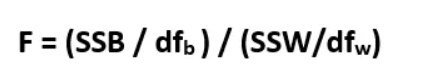
- [ANOVA for Feature Selection in Machine Learning - Explanation](https://towardsdatascience.com/anova-for-feature-selection-in-machine-learning-d9305e228476)

In [ ]:
SelectKBest_using_model(f_classif, "ANOVA F-value Scores Ranks")

                                 Variables        Scores Ranks   P-value
0                                   Gender     12.553357    21  0.000396
1                                      Age   1546.214694    17       0.0
2                            Customer Type   3189.593178    15       0.0
3                           Type of Travel  23148.903889     2       0.0
4                                    Class   22780.94802     3       0.0
5                          Flight Distance   6279.778911    10       0.0
6                          Departure Delay    367.113893    19       0.0
7                            Arrival Delay    820.664572    18       0.0
8   Departure and Arrival Time Convenience    281.008702    20       0.0
9                   Ease of Online Booking   2641.607851    16       0.0
10                        Check-in Service   5472.673565    13       0.0
11                         Online Boarding  30621.479375     1       0.0
12                           Gate Location       1.

### Mutual Information

In [ ]:
SelectKBest_using_model(mutual_info_classif, "Mutual Information Ranks", contain_p_values=False)

                                 Variables    Scores Ranks
0                                   Gender  0.009468    19
1                                      Age  0.044204    14
2                            Customer Type  0.026204    17
3                           Type of Travel   0.12048     4
4                                    Class  0.136935     3
5                          Flight Distance  0.060812     8
6                          Departure Delay  0.005273    20
7                            Arrival Delay  0.003574    21
8   Departure and Arrival Time Convenience  0.003343    22
9                   Ease of Online Booking  0.052603    11
10                        Check-in Service  0.033707    15
11                         Online Boarding  0.213834     1
12                           Gate Location  0.012964    18
13                        On-board Service  0.059587     9
14                            Seat Comfort  0.079665     6
15                        Leg Room Service  0.062062    

## Permutation Important Using ANN 

In [ ]:
# Reference: https://explained.ai/rf-importance/index.html#4
def permutation_importances(model, X_train, y_train, metric): 
    baseline = metric(model.predict(X_train), y_train)
    imp = []
    for col in X_train.columns:
        save = X_train[col].copy()
        
        
        # Repeat the process for 3 times
        average_m    = 0
        for i in range(5):
            X_train[col] = np.random.permutation(X_train[col])  # Random permute the value of selected columns
            m = metric(model.predict(X_train), y_train)         # Get the metric value 
            average_m += m
        average_m /= 5
        
        X_train[col] = save                                 # Restore the value for the columns
        imp.append(baseline - average_m)                    # Save the feature important values
        
    return np.array(imp) # Return Feature Important Values


In [ ]:
%%time
accuracy_list = []
model = MLPClassifier(hidden_layer_sizes=(64, 32, 16,), 
                    random_state=1, max_iter=300, 
                    early_stopping = True).fit(X_train, y_train)

# Since the target variable is quite balance, accuracy is a good metric to measure the model performance

feature_important                = permutation_importances(model, X_train, y_train, accuracy_score)
feature_important_argsort        = feature_important.argsort()                      # perform an indirect sort 
ranks                            = np.zeros_like(feature_important_argsort)         # Create empty array with shape = feature_important.shape
ranks[feature_important_argsort] = np.arange(len(feature_important_argsort), 0, -1) # Rank the highest value of the feature as 1, second highest value as 2, ...

ranking_list.append(ranks)
columns_name.append("ANN Ranking")


pd.DataFrame(np.concatenate([df.columns.to_numpy()[None,:-1], feature_important[None,:], ranks[None,:]], axis=0).T, 
             columns=["Variables","Feature Important Values", "Ranks"] )

CPU times: total: 35min 37s
Wall time: 6min 16s


Variables Feature Important Values Ranks
0                                   Gender                 0.000871    20
1                                      Age                 0.005253    13
2                            Customer Type                 0.084436     4
3                           Type of Travel                 0.166006     2
4                                    Class                 0.032003     5
5                          Flight Distance                 0.000675    21
6                          Departure Delay                 0.000557    22
7                            Arrival Delay                 0.001507    18
8   Departure and Arrival Time Convenience                 0.002162    17
9                   Ease of Online Booking                 0.007897    10
10                        Check-in Service                 0.007266    12
11                         Online Boarding                 0.018848     7
12                           Gate Location                 0.098889     3
13                        On-board Service                 0.003051    16
14                            Seat Comfort                 0.010616     9
15                        Leg Room Service                  0.00332    15
16                             Cleanliness                 0.003832    14
17                          Food and Drink                 0.001368    19
18                       In-flight Service                 0.015526     8
19                  In-flight Wifi Service                  0.25059     1
20                 In-flight Entertainment                 0.007587    11
21                        Baggage Handling                 0.025327     6

In [ ]:
y_test_out = model.predict(X_test)
print("For ANN:")
print("The accuracy  on the test data:",accuracy_score(y_test,y_test_out))
print("The precision on the test data:",precision_score(y_test,y_test_out, average="weighted"))
print("The recall    on the test data:",recall_score(y_test,y_test_out, average="weighted"), "\n")

accuracy_list.append(accuracy_score(y_test,y_test_out))

For ANN:
The accuracy  on the test data: 0.9596550662149677
The precision on the test data: 0.9600304472549926
The recall    on the test data: 0.9596550662149677 



## Recursive Feature Elimination

In [ ]:
def RFE_using_model(model, model_name):
    rfe   = RFE(model, n_features_to_select=1)
    fit   = rfe.fit(X_train, y_train)
    
    # Try to use the fit the model to obtain the accuracy on the test dataset
    model.fit(X_train, y_train)
    y_test_out = model.predict(X_test)
    print(f"For {model_name}:")
    print("The accuracy  on the test data:",accuracy_score(y_test,y_test_out))
    print("The precision on the test data:",precision_score(y_test,y_test_out, average="weighted"))
    print("The recall    on the test data:",recall_score(y_test,y_test_out, average="weighted"), "\n")
    
    ranking_list.append(fit.ranking_)
    columns_name.append(f"{model_name} Ranking")
    accuracy_list.append(accuracy_score(y_test,y_test_out))

### Random Forest in feature selection

In [ ]:
%%time
RFE_using_model(RandomForestClassifier(n_estimators=30, n_jobs=-1), "Random Forest")

For Random Forest:
The accuracy  on the test data: 0.9626065085720152
The precision on the test data: 0.9629456719386289
The recall    on the test data: 0.9626065085720152 

CPU times: total: 4min 21s
Wall time: 32.1 s


### Using Gradient Boosting Classifier

In [ ]:
%%time
RFE_using_model(GradientBoostingClassifier(), "Gradient Boosting Classifier")

For Gradient Boosting Classifier:
The accuracy  on the test data: 0.942331382814906
The precision on the test data: 0.942368433277863
The recall    on the test data: 0.942331382814906 

CPU times: total: 7min 7s
Wall time: 7min 10s


### Using logistic regression

In [ ]:
%%time
RFE_using_model(LogisticRegression(solver = "liblinear"), "Logistic Regression")

For Logistic Regression:
The accuracy  on the test data: 0.8737039318345139
The precision on the test data: 0.8735380808955368
The recall    on the test data: 0.8737039318345139 

CPU times: total: 13.8 s
Wall time: 13.9 s


### Using Linear Support Vector Classification

In [ ]:
%%time
RFE_using_model(LinearSVC(max_iter=5000), "Linear Support Vector Classification")

For Linear Support Vector Classification:
The accuracy  on the test data: 0.8733189610922903
The precision on the test data: 0.8731958383751387
The recall    on the test data: 0.8733189610922903 

CPU times: total: 2min 29s
Wall time: 2min 30s


## Summary on feature selection

In [ ]:
"""
   Average ranking except for the ANOVA F-value and Mutual Information as there are 
   not model that select feature based on the model accuracy  
"""
average_ranking                  = np.average(np.array(ranking_list[2:]), axis=0, weights=np.exp(accuracy_list))
average_ranking_argsort          = np.array(average_ranking).argsort()
ranking                          = np.zeros_like(average_ranking_argsort)
ranking[average_ranking_argsort] = np.arange(1, len(ranking)+1)

ranking_list.extend([average_ranking, ranking])
columns_name.extend(["Average_ranking from ANN to Linear SVC", "Average_ranking from ANN to Linear SVC (int)"])

In [ ]:
df1 = pd.DataFrame(np.concatenate((df.columns.to_numpy()[None,:-1], ranking_list), axis=0).T, 
                   columns=columns_name)
df1

Variables ANOVA F-value Scores Ranks  \
0                                   Gender                       21.0   
1                                      Age                       17.0   
2                            Customer Type                       15.0   
3                           Type of Travel                        2.0   
4                                    Class                        3.0   
5                          Flight Distance                       10.0   
6                          Departure Delay                       19.0   
7                            Arrival Delay                       18.0   
8   Departure and Arrival Time Convenience                       20.0   
9                   Ease of Online Booking                       16.0   
10                        Check-in Service                       13.0   
11                         Online Boarding                        1.0   
12                           Gate Location                       22.0   
13                        On-board Service                        6.0   
14                            Seat Comfort                        5.0   
15                        Leg Room Service                        7.0   
16                             Cleanliness                        8.0   
17                          Food and Drink                       14.0   
18                       In-flight Service                       12.0   
19                  In-flight Wifi Service                        9.0   
20                 In-flight Entertainment                        4.0   
21                        Baggage Handling                       11.0   

   Mutual Information Ranks ANN Ranking Random Forest Ranking  \
0                      19.0        20.0                  22.0   
1                      14.0        13.0                   6.0   
2                      17.0         4.0                  12.0   
3                       4.0         2.0                   7.0   
4                       3.0         5.0                   4.0   
5                       8.0        21.0                   2.0   
6                      20.0        22.0                  20.0   
7                      21.0        18.0                  19.0   
8                      22.0        17.0                  18.0   
9                      11.0        10.0                   9.0   
10                     15.0        12.0                  13.0   
11                      1.0         7.0                   1.0   
12                     18.0         3.0                  17.0   
13                      9.0        16.0                  11.0   
14                      6.0         9.0                  10.0   
15                      7.0        15.0                   8.0   
16                     10.0        14.0                  16.0   
17                     16.0        19.0                  21.0   
18                     13.0         8.0                  15.0   
19                      2.0         1.0                   3.0   
20                      5.0        11.0                   5.0   
21                     12.0         6.0                  14.0   

   Gradient Boosting Classifier Ranking Logistic Regression Ranking  \
0                                  22.0                        22.0   
1                                  14.0                        13.0   
2                                   6.0                         4.0   
3                                   3.0                         3.0   
4                                   4.0                        10.0   
5                                  21.0                        17.0   
6                                  20.0                        19.0   
7                                  16.0                        12.0   
8                                  17.0                        14.0   
9                                  18.0                         9.0   
10                                  8.0                         5.0   
11   

In [ ]:
variables_name = df1["Variables"].to_numpy()
print("Variables with ranking and average ranking > 15:")
print(variables_name[ranking > 15],"\n")
print(variables_name[average_ranking > 15],"\n")
# print(variables_name[average_ranking > 14], "\n")

print("Variables with 10 <= ranking <=15")
print(variables_name[np.logical_and(10 <= ranking, ranking <= 15)], "\n")

print("Variables with ranking < 10 ")
print(variables_name[ranking < 10])

Variables with ranking and average ranking > 15:
['Gender' 'Flight Distance' 'Departure Delay' 'Arrival Delay'
 'Departure and Arrival Time Convenience' 'Gate Location' 'Food and Drink'] 

['Gender' 'Flight Distance' 'Departure Delay' 'Arrival Delay'
 'Departure and Arrival Time Convenience' 'Gate Location' 'Food and Drink'] 

Variables with 10 <= ranking <=15
['Age' 'Ease of Online Booking' 'Seat Comfort' 'Cleanliness'
 'In-flight Service' 'Baggage Handling'] 

Variables with ranking < 10 
['Customer Type' 'Type of Travel' 'Class' 'Check-in Service'
 'Online Boarding' 'On-board Service' 'Leg Room Service'
 'In-flight Wifi Service' 'In-flight Entertainment']


<AxesSubplot:xlabel='Age', ylabel='Count'>

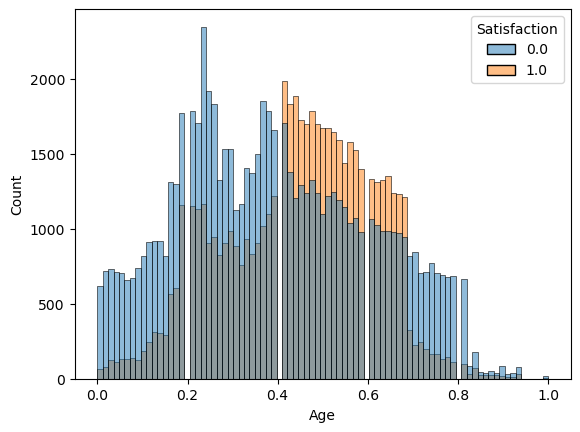

In [ ]:
sns.histplot(data=df, x="Age", hue="Satisfaction")

## Remove some features before factor analysis

In [ ]:
R_14 = ranking <= 15
R_14   # As we also want to remove customer type and type of travel, so we will set index 2 and 3 as False

array([False,  True,  True,  True,  True, False, False, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True])

In [ ]:
R_14[1] = False
R_14[2] = False
R_14[3] = False
R_14

array([False, False, False, False,  True, False, False, False, False,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True,  True,  True,  True])

In [ ]:
X_train = X_train.to_numpy()[:,R_14]
X_test  = X_test.to_numpy()[:,R_14]

variable_selected = variables_name[R_14]
print("The variable selected:", variable_selected)

The variable selected: ['Class' 'Ease of Online Booking' 'Check-in Service' 'Online Boarding'
 'On-board Service' 'Seat Comfort' 'Leg Room Service' 'Cleanliness'
 'In-flight Service' 'In-flight Wifi Service' 'In-flight Entertainment'
 'Baggage Handling']


In [ ]:
# Test the performances on the test dataset after dropping some of the features
model = RandomForestClassifier(n_estimators=30, n_jobs=-1)
model.fit(X_train, y_train)
y_test_out = model.predict(X_test)
print("The accuracy  on the test data:",accuracy_score(y_test,y_test_out))
print("The precision on the test data:",precision_score(y_test,y_test_out, average="weighted"))
print("The recall    on the test data:",recall_score(y_test,y_test_out, average="weighted"), "\n")

The accuracy  on the test data: 0.9422287239503131
The precision on the test data: 0.9422520362317751
The recall    on the test data: 0.9422287239503131 



# Exploratory Factor Analysis (EFA)

In [ ]:
kmo_all, kmo_model = calculate_kmo(X_train)
print('KMO Model Score:', kmo_model)

KMO Model Score: 0.7480765335877009


C:\Users\xinju\anaconda3\lib\site-packages\factor_analyzer\utils.py:244: UserWarning:

The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.



In [ ]:
chi_square, p_value = calculate_bartlett_sphericity(X_train)
print("Bartlett's test of sphericity:")
print("   P-value: ", p_value) #should be less than 0.05 (as close to 0)

Bartlett's test of sphericity:
   P-value:  0.0


In [ ]:
corr = np.corrcoef(X_train, rowvar=False)

In [ ]:
#Factor Analysis
n_factors = X_train.shape[1]
fa = FactorAnalyzer(n_factors, rotation=None, is_corr_matrix=True)
fa.fit(corr)

FactorAnalyzer(is_corr_matrix=True, n_factors=12, rotation=None,
               rotation_kwargs={})

In [ ]:
#Kaiser-Guttman rule
#contains the indices where the eigenvalues of the correlation matrix
eigenvalue, factor_eigenvalue = fa.get_eigenvalues()
idx = np.where(eigenvalue>1)[0]

#recommended number of factors to retain based on the Kaiser-Guttman rule
n_factors_kg = idx.size
print(f"Number of factors (Kaiser-Guttman rule): {n_factors_kg}")

Number of factors (Kaiser-Guttman rule): 4


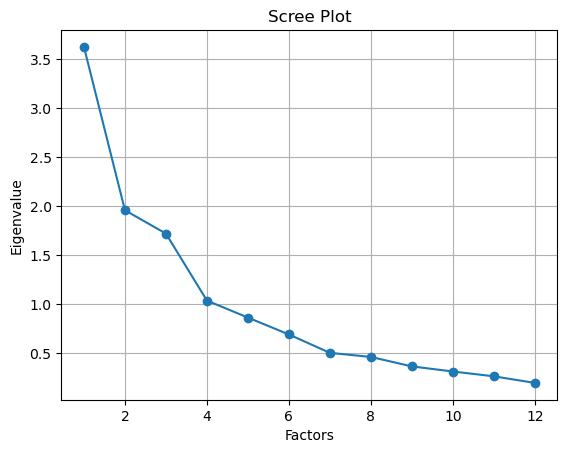

In [ ]:
#Scree plot
plt.plot(range(1,n_factors+1), eigenvalue, marker='o')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [ ]:
orthorgonal = ORTHOGONAL_ROTATIONS
oblique     = OBLIQUE_ROTATIONS
print("The orthorgonal rotations are ",orthorgonal)
print("The oblique rotations are ", oblique)

The orthorgonal rotations are  ['varimax', 'oblimax', 'quartimax', 'equamax', 'geomin_ort']
The oblique rotations are  ['promax', 'oblimin', 'quartimin', 'geomin_obl']


In [ ]:
def loadings_by_rotations(X, rotationtype: str="orthogonal"):
    rotations = {"orthogonal": ORTHOGONAL_ROTATIONS, "oblique": OBLIQUE_ROTATIONS}
    k         = n_factors_kg
    df_       = {"factor":[f for f in range(k)]}
    
    for r in rotations[rotationtype]:   # For each rotation type
        df_[r] = [[] for _ in range(k)]
        fa = FactorAnalyzer(n_factors=k, rotation=r)
        fa.fit(X)                                     # Since is_corr_matrix=False, we can direcly fit(X)
        idx_max = np.argmax(fa.loadings_, axis=1)     # Get the index with maximum factor loading for each row
        
        list(map(lambda idx_max, variable: df_[r][idx_max].append(variable), 
            idx_max, variable_selected))               # Append each variable to its corresponding factor
        
    show_df(pd.DataFrame(df_).set_index("factor"))    # Display the dataframe  

In [ ]:
loadings_by_rotations(X_train)
loadings_by_rotations(X_train, 'oblique')

## Random Forest on transformed dataset

In [ ]:
def RF_fa(X_train, X_test, y_train, y_test, rotationtype):
    k = n_factors_kg
    test_accuracies = []
    for r in rotationtype:
        fa         = FactorAnalyzer(n_factors=k, rotation=r)
        X_train_fa = fa.fit_transform(X_train)
        X_test_fa  = fa.transform(X_test)
        
        model = RandomForestClassifier(n_estimators=30, random_state=100, n_jobs=-1)
        model.fit(X_train_fa, y_train)
        y_hat    = model.predict(X_test_fa)
        test_acc = accuracy_score(y_test, y_hat)
        test_accuracies.append(test_acc)
    return pd.DataFrame({"Rotation type": rotationtype, "Test accuracy": test_accuracies})


In [ ]:
%%time
orth_results = RF_fa(X_train, X_test, y_train, y_test, ORTHOGONAL_ROTATIONS)
obli_results = RF_fa(X_train, X_test, y_train, y_test, OBLIQUE_ROTATIONS)
pd.concat([orth_results, obli_results])

CPU times: total: 5min 16s
Wall time: 37.5 s


Rotation type  Test accuracy
0       varimax       0.912201
1       oblimax       0.906375
2     quartimax       0.913228
3       equamax       0.913228
4    geomin_ort       0.911842
0        promax       0.915435
1       oblimin       0.916179
2     quartimin       0.916179
3    geomin_obl       0.915691

In [ ]:
px.line(pd.concat([orth_results,obli_results]), x='Rotation type', y='Test accuracy', markers=True)

## Feature Important of each factor

In [ ]:
factor_name = {}
factor_name["varimax"]    = ["Overall service quality", "Comfort and Entertainment", "Travel Class and Connectivity", "Check-in and boarding services"]
factor_name["promax"]     = factor_name["varimax"].copy()
factor_name["geomin_ort"] = factor_name["varimax"].copy()

factor_name["quartimax"]  = ["Comfort and Entertainment", "Overall Service quality", "Travel Class and Connectivity", "Check-in and boarding services"]
factor_name["equamax"]    = factor_name["quartimax"].copy()

factor_name["oblimax"]    = ["Overall Service quality", "Technology services", "-","Class"]

factor_name["oblimin"]    = ["Overall service quality", "Comfort and Entertainment", "Travel Class and Connectivity", "Online Boarding"]
factor_name["quartimin"]  = factor_name["oblimin"].copy()

factor_name["geomin_obl"] = ["Overall service quality", "Connectivity", "Comfort and Entertainment", "Check-in and boarding services"]

In [ ]:
%%time
feature_important_list = []

for rotation in ["varimax", "promax", "geomin_ort", "quartimax", "equamax", "oblimax", "oblimin", "quartimin", "geomin_obl"]:
    
    # Transform the dataset 
    fa         = FactorAnalyzer(n_factors=n_factors_kg, rotation=rotation)
    X_train_fa = fa.fit_transform(X_train)
    
    model = RandomForestClassifier(n_estimators=30,n_jobs=-1)
    model.fit(X_train_fa, y_train)

    feature_important_list.append(model.feature_importances_.tolist())
feature_important_list = np.array(feature_important_list)

CPU times: total: 5min 6s
Wall time: 36.4 s


In [ ]:
temp_df = pd.DataFrame(feature_important_list.T, columns=ORTHOGONAL_ROTATIONS + OBLIQUE_ROTATIONS)
temp_df.loc[len(temp_df)] = np.concatenate([orth_results["Test accuracy"].to_numpy(), obli_results["Test accuracy"].to_numpy()])
temp_df.set_index(pd.Index(["Factor 0", "Factor 1", "Factor 2","Factor 3", "Test_accuracy"]))

varimax   oblimax  quartimax   equamax  geomin_ort    promax  \
Factor 0       0.155507  0.132927   0.173086  0.245696    0.249486  0.430484   
Factor 1       0.186107  0.177745   0.189346  0.161953    0.162087  0.217427   
Factor 2       0.360709  0.324458   0.348760  0.358827    0.347050  0.174669   
Factor 3       0.297676  0.364870   0.288808  0.233524    0.241377  0.177420   
Test_accuracy  0.912201  0.906375   0.913228  0.913228    0.911842  0.915435   

                oblimin  quartimin  geomin_obl  
Factor 0       0.161149   0.155924    0.167229  
Factor 1       0.213948   0.224446    0.364705  
Factor 2       0.302579   0.296355    0.134451  
Factor 3       0.322324   0.323275    0.333615  
Test_accuracy  0.916179   0.916179    0.915691

In [ ]:
ordered_factors_df = dict()
for rotation in ORTHOGONAL_ROTATIONS + OBLIQUE_ROTATIONS:
    temp = zip(enumerate(factor_name[rotation]), temp_df.iloc[:-1,:][rotation].values)
    ordered_factors_df[rotation] = [f"{i[0]}: {i[1]}" for i, _ in sorted(temp, key=lambda x: x[1], reverse=True)]
    
ordered_factors_df = pd.DataFrame(ordered_factors_df)
ordered_factors_df.loc[len(ordered_factors_df)] = np.concatenate([orth_results["Test accuracy"].to_numpy(), 
                                                                  obli_results["Test accuracy"].to_numpy()])
ordered_factors_df.set_index(pd.Index(
    ["First priority", "Second priority", "Third priority", "Fourth priority", "Test accuray"]))

varimax  \
First priority    2: Travel Class and Connectivity   
Second priority  3: Check-in and boarding services   
Third priority        1: Comfort and Entertainment   
Fourth priority         0: Overall service quality   
Test accuray                              0.912201   

                                    oblimax  \
First priority                     3: Class   
Second priority                        2: -   
Third priority       1: Technology services   
Fourth priority  0: Overall Service quality   
Test accuray                       0.906375   

                                         quartimax  \
First priority    2: Travel Class and Connectivity   
Second priority  3: Check-in and boarding services   
Third priority          1: Overall Service quality   
Fourth priority       0: Comfort and Entertainment   
Test accuray                              0.913228   

                                           equamax  \
First priority    2: Travel Class and Connectivity   
Second priority       0: Comfort and Entertainment   
Third priority   3: Check-in and boarding services   
Fourth priority         1: Overall Service quality   
Test accuray                              0.913228   

                                        geomin_ort  \
First priority    2: Travel Class and Connectivity   
Second priority         0: Overall service quality   
Third priority   3: Check-in and boarding services   
Fourth priority       1: Comfort and Entertainment   
Test accuray                              0.911842   

                                            promax  \
First priority          0: Overall service quality   
Second priority       1: Comfort and Entertainment   
Third priority   3: Check-in and boarding services   
Fourth priority   2: Travel Class and Connectivity   
Test accuray                              0.915435   

                                          oblimin  \
First priority                 3: Online Boarding   
Second priority  2: Travel Class and Connectivity   
Third priority       1: Comfort and Entertainment   
Fourth priority        0: Overall service quality   
Test accuray                             0.916179   

                                        quartimin  \
First priority                 3: Online Boarding   
Second priority  2: Travel Class and Connectivity   
Third priority       1: Comfort and Entertainment   
Fourth priority        0: Overall service quality   
Test accuray                             0.916179   

                                        geomin_obl  
First priority                     1: Connectivity  
Second priority  3: Check-in and boarding services  
Third priority          0: Overall service quality  
Fourth priority       2: Comfort and Entertainment  
Test accuray                              0.915691

<p style="background-color:#349999;color:black;font-size:35px;text-align:center;border-radius:12px 12px;font-weight:bold;border:2px solid purple;line-height:1.5cm">✈️END✈️
<span style='font-size:35px;'></p></span>